In [ ]:
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive

# gauth = GoogleAuth()
# gauth.LocalWebserverAuth()
# drive = GoogleDrive(gauth)

# folder_id = '1jo43UcmSVCQNW7iYOjFgjyjpsfi5121P'

# file_list = drive.ListFile({'q': f"'{folder_id}' in parents and trashed=false"}).GetList()
# for file in file_list:
#     print(f'Title: {file["title"]}, ID: {file["id"]}')

In [ ]:
# import glob
# import re

# # Get jpeg files
# jpeg_files = glob.glob("../data/raw/*.JPG")
# xls_files = glob.glob("../data/raw/*.xls")

# pattern = r"\(\d+\)"
# image_files = [f for f in jpeg_files if not re.search(pattern, f)]

# print(image_files[0], xls_files[0])

# len(image_files), len(xls_files)

../data/raw/4-GI-P5-C-MACAST.JPG ../data/raw/Y-G1-P4-I-FICUCG_PTR.xls


(2683, 2572)

In [ ]:
# # import matplotlib.pyplot as plt
# from PIL import Image

# image = Image.open(jpeg_files[0])
# image.show()

In [ ]:
# # Move jpegs to separate folder with images
# import shutil
# import os

# source = 'data/raw'
# image_dest = '../data/staged/images'
# tabular_dest = '../data/staged/tabular'

# os.makedirs(image_dest, exist_ok=True)
# os.makedirs(tabular_dest, exist_ok=True)

# for f in image_files:
#     shutil.copy(f, image_dest)

# for f in xls_files:
#     shutil.copy(f, tabular_dest)

### 2. Prepare tabular data 

#### 2.1 Merge individual csv files into one DataFrame

For each csv file split the row number into two.

Descriptions of selected items:

- *Area* - Area of selection in square pixels. Area is in calibrated units, such as square millimeters, if Analyze/Set Scale was used to spatially calibrate the image.
- *Centroid* - The center point of the selection. This is the average of the x and y coordinates of all of the pixels in the selection. 
- *Perimeter* - The length of the outside boundary of the selection. 
- *Bounding Rectangle* - The smallest rectangle enclosing the selection. Uses the headings BX, BY, Width and Height, where BX and BY are the coordinates of the upper left corner of the rectangle. (this will provide leaf width and length in sliced scans)
- *Fit Ellipse* - Fit an ellipse to the selection. Uses the headings Major, Minor and Angle. Major and Minor are the primary and seconday axis of the best fitting ellipse. *Angle* is the angle between the primary axis and a line parallel to the x-axis of the image. Note that ImageJ cannot calculate the major and minor axis lengths if Pixel Aspect Ratio in the Set Scale dialog is not 1.0. 
- *Circularity* - 4pi(area/perimeter^2). A value of 1.0 indicates a perfect circle. As the value approaches 0.0, it indicates an increasingly elongated polygon. Values may not be valid for very small particles. 
- *Feret's Diameter* - The longest distance between any two points along the selection boundary. Also known as the caliper length. The Feret's Diameter macro will draw the Feret's Diameter of the current selection on the image. 
- *Limit to Threshold* - If checked, only thresholded pixels are included in measurement calculations. Use Image/Adjust/Threshold to set the threshold limits. 
- *Display Label* - If checked, the image name and slice number (for stacks) are recoded in the first column of the results table. 
- *Decimal Places* - This is the number of digits to the right of the decimal point in real numbers displayed in the results table and in histogram windows. 

In [ ]:
import glob
import os
import pandas as pd

tabular_dest = '../data/staged/tabular'
image_dest = '../data/staged/images'
xls_files_staged = glob.glob(os.path.join(tabular_dest, "*.xls"))
xls_files_staged[:5]

In [ ]:
example_idx = 234
data = pd.read_csv(xls_files_staged[example_idx], sep='\t')
data

,,Label,Area,X,Y,Perim.,BX,BY,Width,Height,Major,Minor,Angle,Feret,FeretX,FeretY,FeretAngle,MinFeret,XStart,YStart
0,1,N-G5-P6-F-MUSA-SP-1.P.jpg,312.153,34.407,29.210,99.446,29.346,3.976,9.940,43.451,40.577,9.795,89.000,43.595,31.002,47.427,85.329,9.917,726,84
1,2,N-G5-P6-F-MUSA-SP-1.P.jpg,180.165,10.593,18.423,69.768,5.964,8.188,11.218,27.263,23.790,9.643,81.197,27.607,7.857,35.452,70.260,10.481,144,173
2,3,N-G5-P6-F-MUSA-SP-1.P.jpg,232.100,21.033,30.695,77.190,14.389,12.117,11.644,31.002,28.280,10.450,84.373,31.115,22.341,12.117,94.887,11.149,472,256
3,4,N-G5-P6-F-MUSA-SP-1.P.jpg,92.905,45.765,26.768,53.998,41.605,19.737,8.283,21.110,17.725,6.674,90.745,21.313,46.196,40.847,80.412,8.267,979,417
4,5,N-G5-P6-F-MUSA-SP-1.P.jpg,310.280,34.409,29.283,99.446,29.346,3.976,9.940,43.451,40.292,9.805,88.982,43.595,31.002,47.427,85.329,9.917,726,84
5,6,N-G5-P6-F-MUSA-SP-1.P.jpg,179.773,10.593,18.403,69.768,5.964,8.188,11.218,27.263,23.740,9.642,81.163,27.607,7.857,35.452,70.260,10.481,144,173
6,7,N-G5-P6-F-MUSA-SP-1.P.jpg,225.850,21.092,30.814,77.190,14.389,12.117,11.644,31.002,28.011,10.266,84.066,31.115,22.341,12.117,94.887,11.149,472,256
7,8,N-G5-P6-F-MUSA-SP-1.P.jpg,91.729,45.757,26.760,53.998,41.605,19.737,8.283,21.110,17.591,6.639,90.739,21.313,46.196,40.847,80.412,8.267,979,417


In [9]:
def calculate_total_area(file: pd.DataFrame) -> pd.DataFrame:
    """
    For all leaves calculate total area, and total estimated area of leaf blades. Estimations were made by hand in the ImageJ software, 
    where outline of each leaf blade were made by hand.
    Arguments:
        data (dataframe): raw output from the ImageJ software after 
    Returns:
        output (tuple): (label, total_estimated_area, total_area) from which the lost area can be determined.
    """
    data_label = file['Label'].unique().item()
    
    n_rows = file.shape[0]
    
    if n_rows % 2 != 0:
        print(f'In {data_label} the number of rows not even.')
        return

    area =  data['Area']
    total_estimated_area = area[:int(n_rows/2)].sum()
    total_area = area[int(n_rows/2):].sum()

    return data_label, total_estimated_area, total_area

In [10]:
label, leaf_est_area, leaf_area = calculate_total_area(data)
print(leaf_est_area)

817.323


In [12]:
import pandas as pd

xls_files_staged = glob.glob(os.path.join(tabular_dest, "*.xls"))

In [20]:
xls_files_staged[:5]

['../data/staged/tabular/Y-G1-P4-I-FICUCG_PTR.xls',
 '../data/staged/tabular/N-G2-P6-CH-PIPTAR_PTR.xls',
 '../data/staged/tabular/Y-G2-P3-H-PIPESU_PTR.xls',
 '../data/staged/tabular/N-G3-P4-H-MUSAPE_PTR.xls',
 '../data/staged/tabular/4-GI-P5-C-DIPLES_PTR.xls']

Concatenate individual rows from csv files.

In [21]:
df = pd.DataFrame()

for f in xls_files_staged:
    
    try:
        data = pd.read_csv(f, sep='\t')
    except Exception as e:
        print("Data did not read properly")
    
    try:
        label, leaf_est_area, leaf_area = calculate_total_area(data)
    except Exception as e:
        print(e)
        print(f"Something went wrong in {label}")

    df_row = pd.DataFrame(
        {
            'label': label,
            'est_area': [leaf_est_area],
            'area': [leaf_area],
        }
    )
    df= pd.concat([df, df_row], ignore_index=True)

In Y-G1-P2-H-ALPHIN.P.jpg the number of rows not even.
cannot unpack non-iterable NoneType object
Something went wrong in Y-G1-P6-CH-NOTHOCNIDE-SP-1.P.jpg
can only convert an array of size 1 to a Python scalar
Something went wrong in N-G5-P6-F-MUSAPE.P.jpg
In Y-G2-P1-C-POLYST_PT.tif the number of rows not even.
cannot unpack non-iterable NoneType object
Something went wrong in N-G5-P6-F-AMOMAC.P.jpg
In 4-GI-P5-C-PLEURANTHODIUM-SP-2.P.jpg the number of rows not even.
cannot unpack non-iterable NoneType object
Something went wrong in N-G4-P3-CH-MIRRPL.P.jpg
In Y-G2-P3-H-SELAGINELLA-SP-1.P.jpg the number of rows not even.
cannot unpack non-iterable NoneType object
Something went wrong in N-G6-P4-P-SMILAU.P.jpg
In 4-GI-P5-C-CYPHOLOPHUS-SP5.P.jpg the number of rows not even.
cannot unpack non-iterable NoneType object
Something went wrong in N-G1-P3-P-HORNLY.P.jpg
In N-G7-P3-H-PARSONSIA-SP-1.P.jpg the number of rows not even.
cannot unpack non-iterable NoneType object
Something went wrong in

Investigate problematic IDs.

In [29]:
from itertools import compress

def find_file_by_label(
        label: str, 
        data_path_list: list = xls_files_staged
        ) -> pd.DataFrame:
    """
    Find given label in file path lists.
    Arguments:
        label (string): id of a datapoint.
        data_path_list (list): list of all data paths to search
    Returns:
        data (pd.DataFrame): 
    """
    label = label.replace('.P.jpg', '')
    bool_list = [label in file_path for file_path in data_path_list]
    res = list(compress(data_path_list, bool_list))
    data = pd.read_csv(res[0], sep='\t')
    return data

Here we have an odd number of rows, but it looks like the last row doesnt have a pair. We could still, at least for the individual leaf analysis use the remaining observations. For the total area it needs to be checked, whether this last observation is extra or is there something missing here. Look how many leaves are in corresponding picture.

In [ ]:
find_file_by_label(label='Y-G1-P2-H-ALPHIN.P.jpg')

,,Label,Area,X,Y,Perim.,BX,BY,Width,Height,Major,Minor,Angle,Feret,FeretX,FeretY,FeretAngle,MinFeret,XStart,YStart
0,1,Y-G1-P2-H-ALPHIN.P.jpg,7.154,39.759,21.334,30.576,38.669,18.321,2.211,5.875,4.658,1.956,82.885,5.932,39.713,24.196,82.066,2.133,1977,895
1,2,Y-G1-P2-H-ALPHIN.P.jpg,87.830,28.530,27.522,68.237,24.401,18.976,8.188,16.254,14.634,7.641,88.316,16.285,28.045,35.230,86.469,8.031,1418,927
2,3,Y-G1-P2-H-ALPHIN.P.jpg,88.133,40.171,34.033,42.336,35.926,26.427,8.106,14.984,14.218,7.893,83.788,15.062,39.140,41.391,83.445,8.081,1982,1291
3,4,Y-G1-P2-H-ALPHIN.P.jpg,79.736,12.899,37.392,71.894,8.925,28.925,7.820,17.298,15.863,6.400,97.077,17.315,11.709,28.925,92.575,7.368,572,1413
4,5,Y-G1-P2-H-ALPHIN.P.jpg,5.316,39.800,21.372,30.576,38.669,18.321,2.211,5.875,4.153,1.630,83.094,5.932,39.713,24.196,82.066,2.133,1977,895
5,6,Y-G1-P2-H-ALPHIN.P.jpg,77.010,28.510,27.694,68.237,24.401,18.976,8.188,16.254,13.639,7.189,88.280,16.285,28.045,35.230,86.469,8.031,1418,927
6,7,Y-G1-P2-H-ALPHIN.P.jpg,48.269,39.815,36.159,42.336,35.926,26.427,8.106,14.984,9.292,6.614,87.108,15.062,39.140,41.391,83.445,8.081,1982,1291
7,8,Y-G1-P2-H-ALPHIN.P.jpg,47.022,13.514,39.465,71.894,8.925,28.925,7.820,17.298,10.868,5.509,90.314,17.315,11.709,28.925,92.575,7.368,572,1413
8,9,Y-G1-P2-H-ALPHIN.P.jpg,3.162,11.708,33.324,23.170,10.379,31.791,3.808,3.603,2.735,1.472,36.565,4.210,10.768,35.394,35.700,2.338,609,1553


Here we have another problem with `'Y-G1-P6-CH-NOTHOCNIDE-SP-1.P.jpg'`.

In [ ]:
data_test = find_file_by_label(label = 'Y-G1-P6-CH-NOTHOCNIDE-SP-1') # Something went wrong!
calculate_total_area(data_test)

Seems to be working just fine... I'll have a look at this later, now I have a decent, almost clean dataset (almost because I wont be able to read tif images from it, so tifs need to be removed from now.)

In [34]:
df.shape

(2572, 3)

In [35]:
df.head()

,label,est_area,area
0,Y-G1-P4-I-FICUCG.P.jpg,707.767,694.796
1,N-G2-P6-CH-PIPTAR.P.tif,732.644,702.622
2,Y-G2-P3-H-PIPESU.P.jpg,201.620,200.910
3,N-G3-P4-H-MUSAPE.P.jpg,68.260,64.600
4,4-GI-P5-C-DIPLES.P.jpg,521.244,496.762


#### 2.2 Add image access paths to image ID's

In [36]:
df['label'] = [f.replace('.P', '') for f in df['label']]

In [40]:
df['image_path'] = [f"{image_dest}/{label}" for label in df['label']]
df['image_path'] = [f.replace('.jpg', '.JPG') for f in df['image_path']]
df['area_lost'] = df['est_area'] - df['area']

for each 

In [41]:
df.head()

,label,est_area,area,image_path,area_lost
0,Y-G1-P4-I-FICUCG.jpg,707.767,694.796,../data/staged/images/Y-G1-P4-I-FICUCG.JPG,12.971
1,N-G2-P6-CH-PIPTAR.tif,732.644,702.622,../data/staged/images/N-G2-P6-CH-PIPTAR.tif,30.022
2,Y-G2-P3-H-PIPESU.jpg,201.620,200.910,../data/staged/images/Y-G2-P3-H-PIPESU.JPG,0.710
3,N-G3-P4-H-MUSAPE.jpg,68.260,64.600,../data/staged/images/N-G3-P4-H-MUSAPE.JPG,3.660
4,4-GI-P5-C-DIPLES.jpg,521.244,496.762,../data/staged/images/4-GI-P5-C-DIPLES.JPG,24.482


#### 2.3. Save tabular data file into processed stage

Not processed original images are in the `data/staged/images` folder.

In [42]:
df.to_csv(os.path.join('../data/processed','data.csv'))

### 3 Read the data, prepare datasests, dataloaders and train the model

In [1]:
# How big are the images.
import pandas as pd
from PIL import Image

data = pd.read_csv('../data/processed/data.csv')

I need to iterate through the dataset to idenify paths for which photos are not present (or their names are different). There should be a good way to fix these names and clean them before that step.

In [2]:
data.head()

def is_image_from_path_readable(image_path):
    try:
        img = Image.open(image_path)
    except Exception as e:
        print(e)
        return False
    return True

In [3]:
import glob
import os
image_dest = '../data/staged/images'
image_list = glob.glob(os.path.join(image_dest, "*"))

In [4]:
data['img_id_exists'] = [f in image_list for f in data['image_path']]

In [5]:
# image_path = data['image_path'][1]
# # img = Image.open(image_path)
# image_path

Filter rows of the dataset using the `img_id_exists` flag.

In [6]:
data_filtered = data[data['img_id_exists'] == True]

In [7]:
data_filtered.shape

(2401, 7)

Juat to double check run also my image reading function on each row of the data_filtered.

In [8]:
img_path_check = [is_image_from_path_readable(image_path=f) for f in data_filtered['image_path']]

In [9]:
sum(img_path_check) == len(img_path_check)

True

In [10]:
data_filtered.to_csv(os.path.join('../data/processed','data_filtered.csv'))

In [ ]:
# import cv2
# idx = 20
# img_path = data.iloc[idx]['image_path']
# img = cv2.imread(img_path)

For some images they may be in a form of a TIFF image. Look for it in the raw data folder, or delete rows referring to these images for now.

In [4]:
# print(img.format)
# print(img.size)
# print(img.mode)

In [ ]:
# import cv2
# img = cv2.imread(data['image_path'][idx])

In [ ]:
# img.shape

(3000, 4000, 3)

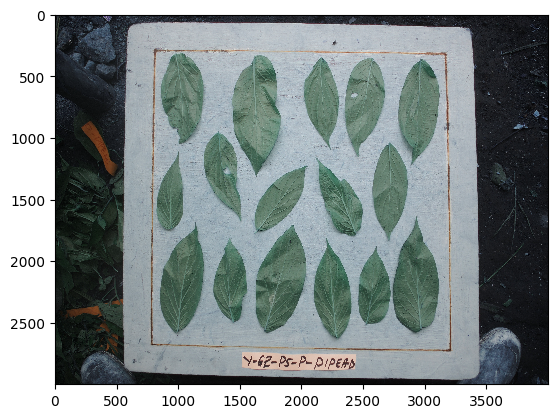

In [ ]:
# from matplotlib import pyplot as plt
# plt.imshow(img, interpolation='nearest')
# plt.show()

#### 3.0 Read the Filtered Dataset

Load the filtered data.

In [13]:
data = pd.read_csv('../data/processed/data_filtered.csv')
data.shape

(2401, 8)

Divide data into train, validation and test. Data needs to be shuffled because in the folder images are clustered based on gardens.

In [16]:
from sklearn.model_selection import train_test_split

X_train_temp, X_test = train_test_split(
    data, test_size=0.10, random_state=42, shuffle=True
)

data.shape, X_train_temp.shape, X_test.shape

X_train, X_val = train_test_split(
    X_train_temp, test_size=0.15, random_state=42
)

print(f"Shape of the whole set: {data.shape}; \nTrain shape: {X_train.shape}; \nValidation shape {X_val.shape}; \nTest set: {X_test.shape}")

Shape of the whole set: (2401, 8); 
Train shape: (1836, 8); 
Validation shape (324, 8); 
Test set: (241, 8)


#### 3.1 Define custom dataset

In [17]:
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms

In [18]:
import torch
# print(torch.__version__)

In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

Create a custom dataset that fetches the image based on the file path from the tabular dataset. Taular dataset also needst to be processsed in order to return a cumulative leaf loss value. Each file has an even nuber of rows: if one divides the number of rows by two, the upper rows are meaurments for the individual leaf true area, and bottom rows are the expected leaf areas. At this stage, the cumulative value for the whole leaf frame will be calculated. Next step is going to be to process each leaf individually.

In [21]:
class LeafFrameDataset(Dataset):
    def __init__(self, data, transformations, target_name = 'area_lost', 
                 ):
        """
        Arguments:
            dataset (string): Path to the csv file with tabular data.
            transformations (list): List of transformations on the images
            target_name (string): Name of the target column.
        """
        self.data = data
        self.target_name = target_name
        self.transformations = transformations

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_path = self.data.iloc[idx]['image_path']
        # img = cv2.imread(img_path)
        img = Image.open(img_path)
        
        if self.transformations is not None:
            img = self.transformations(img)
        
        target = data.iloc[idx][self.target_name]
        sample = {'image': img, 'target': target}
        
        return sample

In [22]:
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])
transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.CenterCrop((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

In [23]:
train_dataset = LeafFrameDataset(
    X_train, 
    transformations=transforms_train, 
    target_name='area_lost'
)

val_dataset = LeafFrameDataset(
    X_val,
    transformations=transforms_test,
    target_name='area_lost'
)

Read an example image from the dataset.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0151556..2.3088455].


324

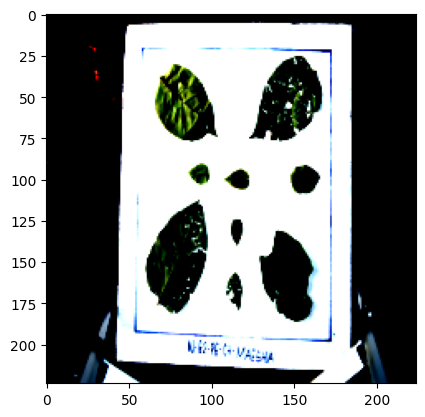

In [26]:
# plt.imshow(train_dataset[201]['image'].permute(1,2,0))
import matplotlib.pyplot as plt
plt.imshow(val_dataset[100]['image'].permute(1,2,0))
len(val_dataset)

In [27]:
train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=8,
    shuffle=True,
    num_workers=0
)
val_dataloader = DataLoader(
    dataset=val_dataset,
    batch_size=8,
    num_workers=0
)

In [28]:
example_data_point = next(iter(train_dataloader))
example_data_point['image'].shape

torch.Size([8, 3, 224, 224])

As an initial model I will use ResNer18. Later I can experiment with different architectures.

Lets see how does the model peform withoth fine tunning. Since the model will be dealing with the regression problem we provide a tunable head to the model wher we can adjust the nuber of layers in the models head.

In [45]:
from torchvision import models
from torch import nn
from torch.nn import MSELoss
from torch.optim import Adam, lr_scheduler

model = models.resnet18(weights='IMAGENET1K_V1')

for param in model.parameters():
    param.requires_grad = False

# Newly added layers have grad = True
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 1)
model = model.to(device)

Eligable loss functions:

1. Mean Squared Error Loss (MSELoss)
Class: torch.nn.MSELoss
Description: Computes the mean of the squared differences between the predicted and target values.
Use Case: General regression tasks where minimizing large deviations is important.
Code Example:
python
Skopiuj kod
import torch.nn as nn
criterion = nn.MSELoss()
loss = criterion(predicted, target)
2. Mean Absolute Error Loss (L1Loss)
Class: torch.nn.L1Loss
Description: Computes the mean of the absolute differences between the predicted and target values.
Use Case: Robust regression tasks where outliers need less influence.
Code Example:
python
Skopiuj kod
import torch.nn as nn
criterion = nn.L1Loss()
loss = criterion(predicted, target)
3. Huber Loss
Class: torch.nn.HuberLoss
Description: Combines the benefits of MSE and MAE by being quadratic for small errors and linear for large errors.
Use Case: Regression tasks sensitive to outliers but still penalize small deviations significantly.
Code Example:
python
Skopiuj kod
import torch.nn as nn
criterion = nn.HuberLoss(delta=1.0)  # delta controls sensitivity to outliers
loss = criterion(predicted, target)
4. Smooth L1 Loss
Class: torch.nn.SmoothL1Loss
Description: Similar to Huber Loss with 
δ=1, and often used in object detection tasks.
Use Case: A balanced alternative between MSE and MAE.
Code Example:
python
Skopiuj kod
import torch.nn as nn
criterion = nn.SmoothL1Loss()
loss = criterion(predicted, target)
5. Poisson Negative Log Likelihood Loss
Class: torch.nn.PoissonNLLLoss
Description: Suitable for regression problems where the target follows a Poisson distribution.
L=input−target⋅log(input)+log(target!)
Use Case: Regression tasks involving count data.
Code Example:
python
Skopiuj kod
import torch.nn as nn
criterion = nn.PoissonNLLLoss()
loss = criterion(predicted, target)
6. KL Divergence Loss
Class: torch.nn.KLDivLoss
Description: Measures the difference between two probability distributions.
Use Case: Regression tasks where predicted values represent a probability distribution.
Code Example:
python
Skopiuj kod
import torch.nn as nn
criterion = nn.KLDivLoss(reduction='batchmean')
loss = criterion(predicted, target)
Choosing the Right Loss Function
MSELoss: Use when large errors need to be penalized heavily.
L1Loss: Use when robustness to outliers is needed.
HuberLoss / SmoothL1Loss: Use for balanced robustness and sensitivity to outliers.
PoissonNLLLoss: Use for count data.
KLDivLoss: Use for regression involving probability distributions.
Would you like help implementing any of these in a model?

In [46]:
loss_fn = MSELoss()
optimizer = Adam(model.parameters(), amsgrad=True)
lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
# dataloaders = 
# https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html#load-data

In [ ]:
import time

def train_model(
    model,
    loss_fn,
    optimizer,
    scheduler,
    num_epochs=2
):
    since = time.time()

    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')
        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0
        
        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()
                else:
                    model.eval()

                running_loss = 0.0
                running_mse = 0.0

                for inputs, labels in dataloaders[phase]